In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#Visualization
#import sweetviz as sv
#label encoding
from sklearn import preprocessing
label_ecoder = preprocessing.LabelEncoder()
#CHI 2 Test 
import scipy.stats as stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency 
#Train test split
from sklearn.model_selection import train_test_split
#Logistic Regression function-=-=-=-=-=-=-=-=-=-=-=-=-=-=------------------
import statsmodels.api as smapi 
from sklearn import metrics
from sklearn.metrics import classification_report
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
#Grid Search
from sklearn.model_selection import GridSearchCV
#Random Forest
from sklearn.ensemble import RandomForestClassifier


In [2]:
pd.set_option('max_columns', None)
#pd.set_option('max_rows', None)
pd.set_option('max_colwidth', None)


In [3]:
path = "C:/Users/aksha/Desktop/Phython_spyder/projects/Win Prediction/Win_Prediction_Data.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code
0,Telecom,Solution 7,27-Mar-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,25-Sep-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,01-Aug-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,28-Apr-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,03-Jun-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [5]:
df.shape
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Client_Category   9982 non-null   object 
 1   Solution_Type     10061 non-null  object 
 2   Deal_Date         10061 non-null  object 
 3   Sector            10061 non-null  object 
 4   Location          10061 non-null  object 
 5   VP_Name           10061 non-null  object 
 6   Manager_Name      10061 non-null  object 
 7   Deal_Cost         10061 non-null  float64
 8   Deal_Status_Code  10061 non-null  object 
dtypes: float64(1), object(8)
memory usage: 707.5+ KB


Index(['Client_Category', 'Solution_Type', 'Deal_Date', 'Sector', 'Location',
       'VP_Name', 'Manager_Name', 'Deal_Cost', 'Deal_Status_Code'],
      dtype='object')

In [6]:
"""##check for nulls

"""

df.isnull().sum()

Client_Category     79
Solution_Type        0
Deal_Date            0
Sector               0
Location             0
VP_Name              0
Manager_Name         0
Deal_Cost            0
Deal_Status_Code     0
dtype: int64

In [34]:
"""##Check for 0 in Deal Cost"""

df['Deal_Cost'][df.Deal_Cost==0].count().sum()
#246

0

In [8]:
"""##check distribution of win and loss"""

df['Deal_Status_Code'].value_counts()

Lost    6306
Won     3755
Name: Deal_Status_Code, dtype: int64

In [9]:
#label encoding Deal_Status_Code
df['Deal_Status_Code'] =  label_ecoder.fit_transform(df['Deal_Status_Code'])

df['Deal_Status_Code']

0        1
1        1
2        0
3        0
4        0
        ..
10056    0
10057    1
10058    0
10059    1
10060    0
Name: Deal_Status_Code, Length: 10061, dtype: int32

## Visualization function


In [10]:
#count graph


def count_grph(data,x):
  fig = plt.gcf()
  fig.set_size_inches(17, 8)

  plt.hist(x=data[x],rwidth=0.7,bins=len(data[x].unique()))
  plt.xticks(data[x],rotation='vertical',size=13)
  plt.show()


In [144]:
"""Comparing X with Deal_Status_count

"""

def vs_dealstatus(data,x):
  cs = data.groupby(x).Deal_Status_Code.value_counts(normalize=False)
  #cs
  cs.unstack()
  cs.unstack().plot(kind='bar',figsize=(17, 9))
  return(cs.unstack())



In [79]:
def boxplot(data,c):
     sns.boxplot(y= data[c],data=data)
     plt.show()
     return(1)

## CLIENT CATEGORY

In [12]:
df['Location'][df.Client_Category.isnull()].value_counts()
#All location is L10 where Client_Category is null


L10    79
Name: Location, dtype: int64

In [13]:
df.Client_Category[df.Location=='L10'].mode()
#Mode is Others

#converting the nulls to Others value as location L10 has Others as mode of Client_Category mode*
df.Client_Category = df.Client_Category.fillna('Others')


In [14]:
df.isnull().sum()


Client_Category     0
Solution_Type       0
Deal_Date           0
Sector              0
Location            0
VP_Name             0
Manager_Name        0
Deal_Cost           0
Deal_Status_Code    0
dtype: int64

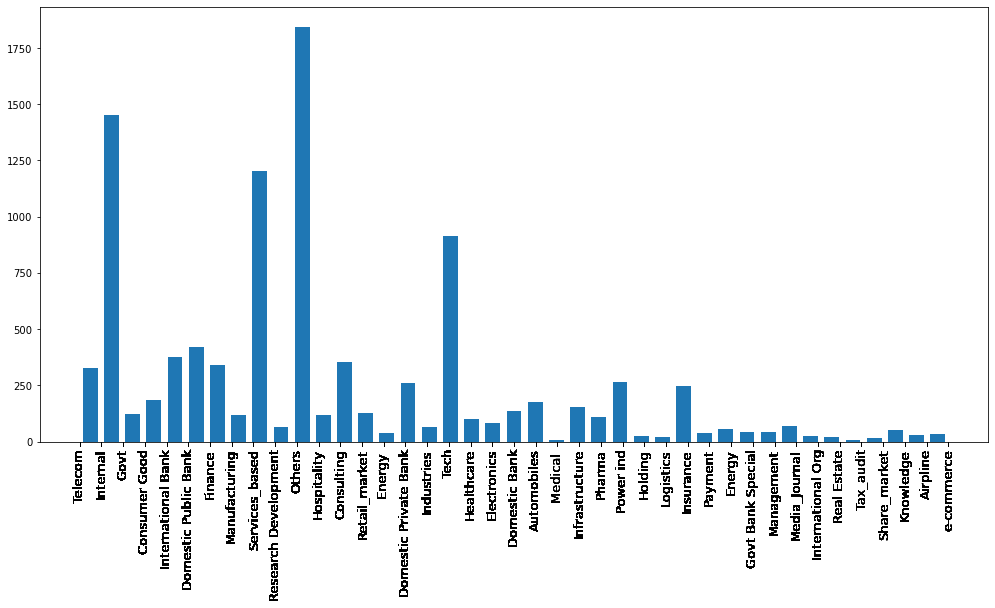

In [15]:
#Distribution of Client_Category
fig = plt.gcf()
fig.set_size_inches(17, 8)

plt.hist(x=df.Client_Category,rwidth=0.7,bins=len(df.Client_Category.unique()))
plt.xticks(df.Client_Category,rotation='vertical',size=13)
plt.show()

In [16]:
len(df.Client_Category.unique()) #41 #high cardinality

41

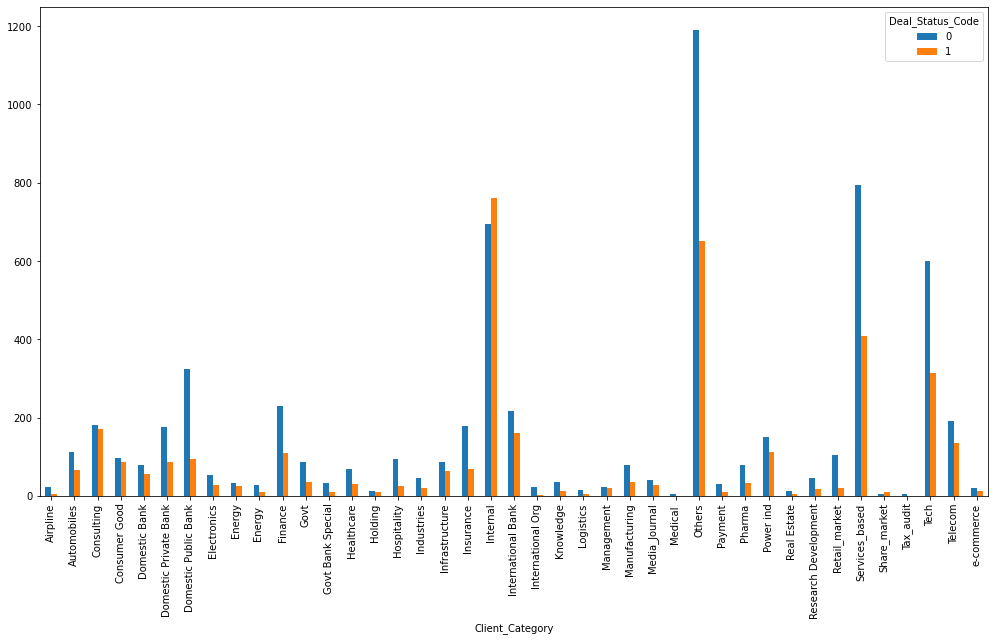

In [17]:
cs_Client_Category = vs_dealstatus(data=df,x='Client_Category')

#### there are more wins then loss for client category "Internal" and "Share market"
#### on observing counts and CS.unstack bar we can keep 10 frequent values for encoding and add other values to 'Others'

In [22]:
#keep only 15  (41 - 15)
bottom31 = [x for x in df.Client_Category.value_counts().sort_values(ascending=False).tail(41-17).index]


In [23]:
bottom31

['Govt',
 'Hospitality',
 'Manufacturing',
 'Pharma',
 'Healthcare',
 'Electronics',
 'Media_Journal',
 'Industries',
 'Research Development',
 'Energy',
 'Knowledge',
 'Management',
 'Govt Bank Special',
 'Payment',
 'Energy ',
 'e-commerce',
 'Airpline',
 'Holding',
 'International Org',
 'Logistics',
 'Real Estate',
 'Share_market',
 'Tax_audit',
 'Medical ']

In [24]:
for label in bottom31:
    df['Client_Category'] = df['Client_Category'].replace(label,'Others')

df.Client_Category.value_counts()


Others                   3131
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Name: Client_Category, dtype: int64

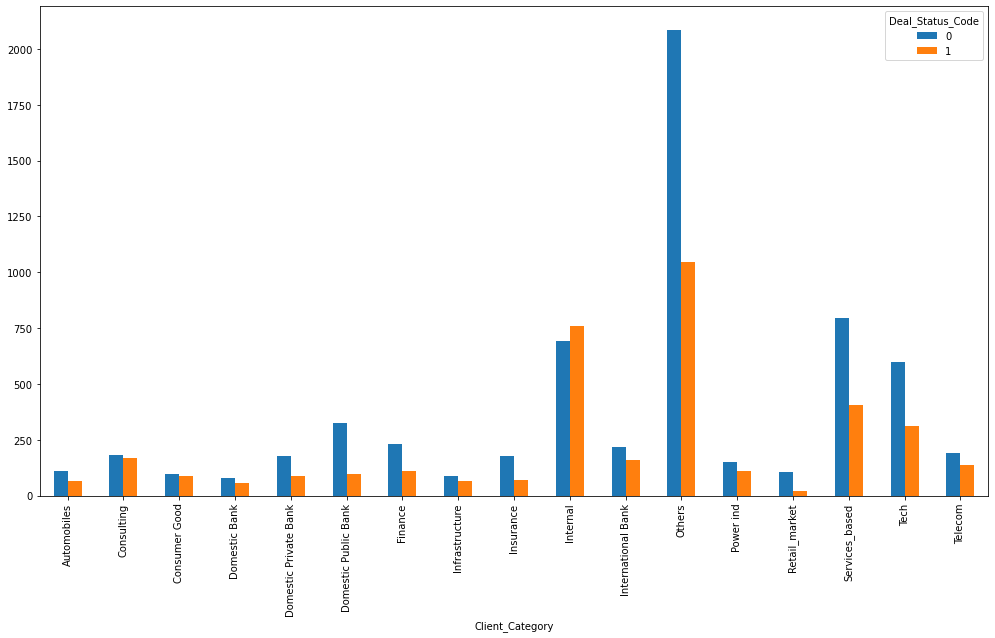

In [25]:
cs_Client_Category1 = vs_dealstatus(data=df,x='Client_Category')


## Deal Cost

In [26]:
df["Deal_Cost"].describe()

count    1.006100e+04
mean     7.668969e+05
std      1.619894e+06
min      0.000000e+00
25%      1.897059e+05
50%      3.823529e+05
75%      7.647059e+05
max      3.676471e+07
Name: Deal_Cost, dtype: float64

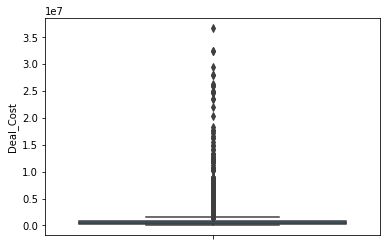

1

In [30]:
boxplot(df, "Deal_Cost")


#### many outliers #### perform np log transformation incase we apply logistic regression

In [32]:
df['Deal_Status_Code'][df.Deal_Cost==0].value_counts()
#only 4 are won in 246
df.groupby('Deal_Status_Code').Deal_Cost.median()


Deal_Status_Code
0    426470.59
1    345000.59
Name: Deal_Cost, dtype: float64

In [33]:
df['Deal_Cost'][(df.Deal_Cost==0) & (df.Deal_Status_Code == 0)] = 426470.59
df['Deal_Cost'][(df.Deal_Cost==0) & (df.Deal_Status_Code == 1)] = 345000.59

<ipython-input-33-260cab482fd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Deal_Cost'][(df.Deal_Cost==0) & (df.Deal_Status_Code == 0)] = 426470.59


##### check impact on Deal status Code

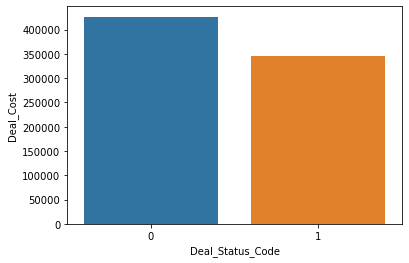

In [35]:
groupedvalues  = df.groupby('Deal_Status_Code')['Deal_Cost'].median().reset_index()
groupedvalues.sort_values(by=['Deal_Cost'])


g = sns.barplot(x=groupedvalues["Deal_Status_Code"],y=groupedvalues["Deal_Cost"],data=groupedvalues)


#### Anova test to check significane of Deal Staus Code and Deal Cost

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [37]:
model = ols('Deal_Cost~Deal_Status_Code',data=df).fit()
anova = sm.stats.anova_lm(model,typ = 2)
pval = anova['PR(>F)'][0]
pval

0.6963075253465635

In [38]:
if pval < 0.05:
    print('Deal_cost is significant')
else:
    print('Deal_cost is not significant')

Deal_cost is not significant


## Solution Type

In [40]:
len(df['Solution_Type'].unique())

67

In [41]:
print(df['Solution_Type'].value_counts().head(15))

Solution 32    1439
Solution 9     1418
Solution 10    1016
Solution 39     585
Solution 67     584
Solution 37     502
Solution 59     478
Solution 12     440
Solution 8      374
Solution 29     343
Solution 6      327
Solution 13     312
Solution 31     274
Solution 4      257
Solution 28     222
Name: Solution_Type, dtype: int64


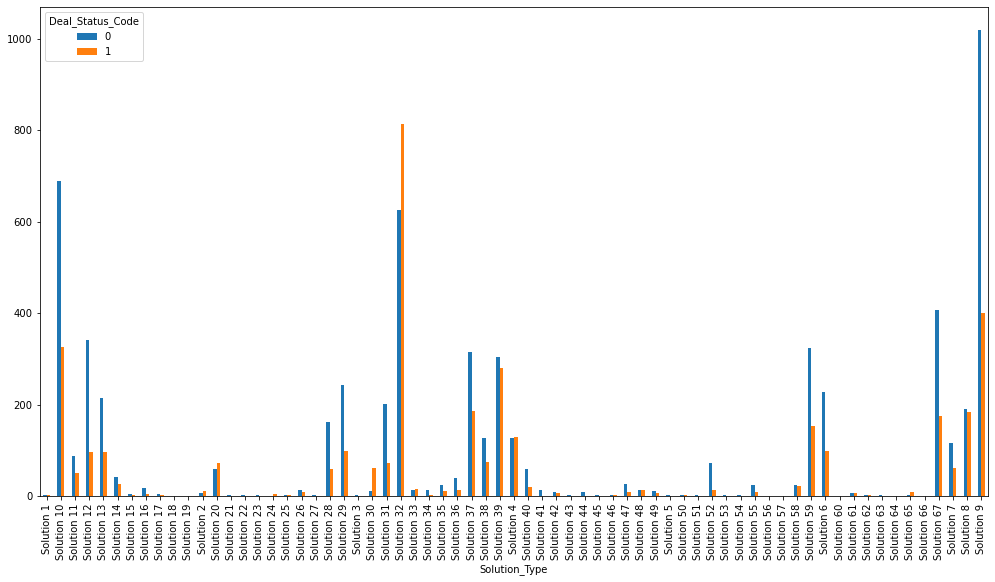

In [42]:
cs_slntype = vs_dealstatus(data=df,x='Solution_Type')

#### Solution 32 has mode win rate
#### converting low counts to Others

In [43]:
bottom_54 = [x for x in df['Solution_Type'].value_counts().sort_values(ascending=False).tail(67-15).index]

for label in bottom_54:
    df['Solution_Type'] = df['Solution_Type'].replace(label,'Other_Soln')


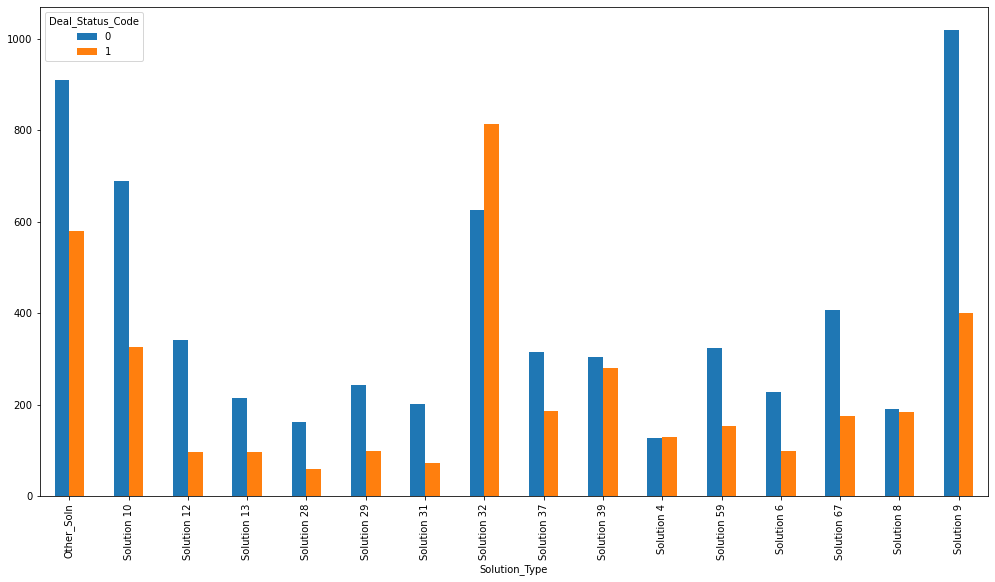

In [45]:
cs_slntype1 = vs_dealstatus(data=df,x='Solution_Type')

## Sector

In [46]:
len(df.Sector.unique())

25

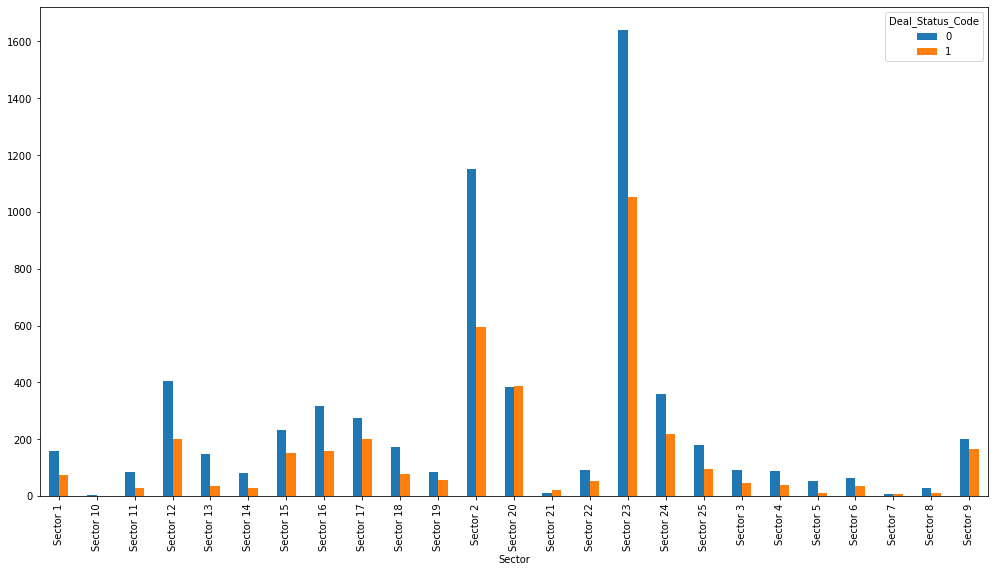

In [47]:
cs_sector = vs_dealstatus(data=df,x='Sector')

#### converting Sector with low count to 'others'

In [48]:
df.Sector = df.Sector.replace(['Sector 3','Sector 4',
                               'Sector 11','Sector 14','Sector 6',
                               'Sector 5','Sector 8','Sector 21','Sector 7',
                               'Sector 10'],'Other_Sector')

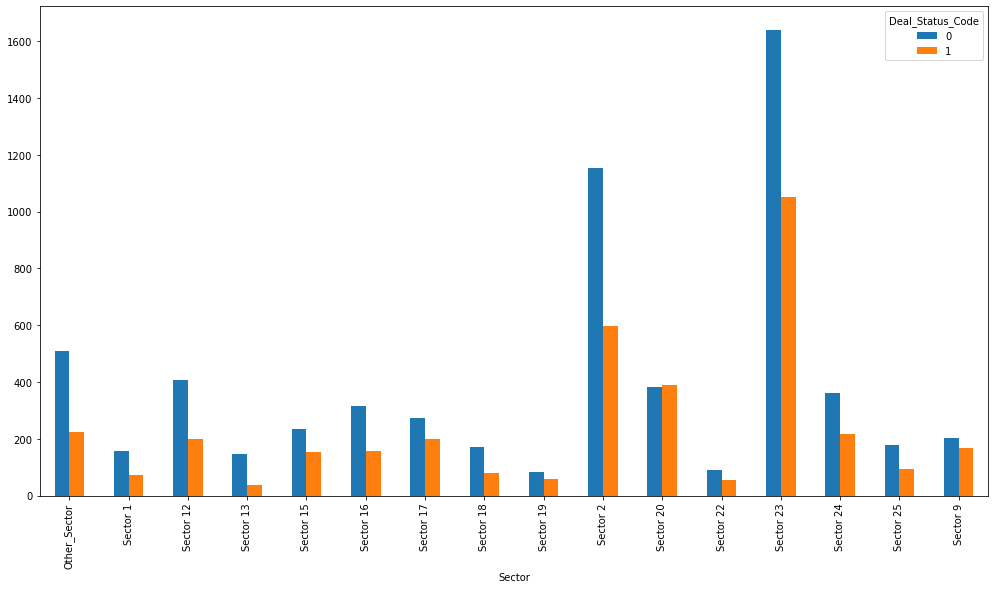

In [49]:
cs_sector1 = vs_dealstatus(data=df,x='Sector')

## Location

In [50]:
df.Location.value_counts()

L10       3360
L5        2328
L1        1572
Others     817
L3         556
L11        367
L12        276
L9         240
L7         238
L4         188
L6         100
L8          11
L2           8
Name: Location, dtype: int64

In [51]:
df.Location = df.Location.replace(['L8','L2','L6','L4','L7'],'Others')

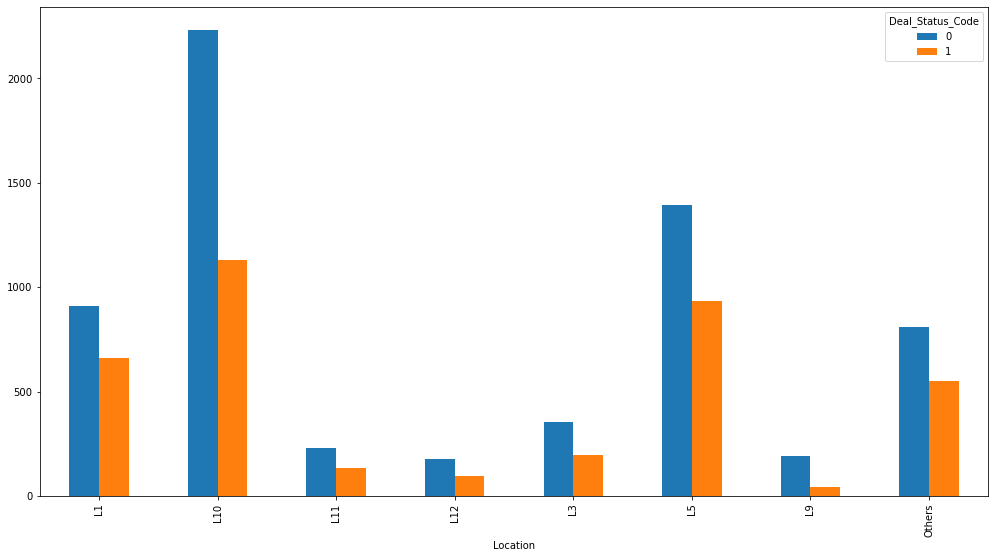

In [52]:
cs_location = vs_dealstatus(data=df,x='Location')

## Chi2 Test
### creating a for loop for  chi- square code

In [54]:
fc = df.select_dtypes(include='object').columns.values
print(fc)

['Client_Category' 'Solution_Type' 'Deal_Date' 'Sector' 'Location'
 'VP_Name' 'Manager_Name']


In [55]:
for features in fc:
    ct = pd.crosstab(df[features],df['Deal_Status_Code'])
    #observer value
    observed_values = ct.values
    
    #expected value
    val = chi2_contingency(ct)
    expected_val = val[3]
    
    #degree of freedom
    no_of_columns = len(df['Deal_Status_Code'].unique())
    no_of_rows = len(df[features].unique())
    ddof = (no_of_rows-1)*(no_of_columns-1)
    #print('degree of freedom',ddof)
    
    #variacne ratio : learning rate
    alpha = 0.05
    
    #chi2 formula
    chi_square = sum([(o-e)**2/e for e,o in zip(observed_values,expected_val)])
    
    #chisquare statistics
    chi_sq_statistics = chi_square[0] +chi_square[1]
    #print(chi_sq_statistics)
    
    #critical value
    critical_value = chi2.ppf(q=1-alpha,df=ddof)
    critical_value
    
    #if condition stating the relation with target variable
    if chi_sq_statistics >= critical_value:
        print('reject H0,there is a relationship between {} and target variable'.format(features))
    else:
        print('retain H0,there is no relationship between {} and target variable'.format(features))


reject H0,there is a relationship between Client_Category and target variable
reject H0,there is a relationship between Solution_Type and target variable
reject H0,there is a relationship between Deal_Date and target variable
reject H0,there is a relationship between Sector and target variable
reject H0,there is a relationship between Location and target variable
reject H0,there is a relationship between VP_Name and target variable
reject H0,there is a relationship between Manager_Name and target variable


<ipython-input-55-100b450e34a5>:20: RuntimeWarning: divide by zero encountered in true_divide
  chi_square = sum([(o-e)**2/e for e,o in zip(observed_values,expected_val)])
<ipython-input-55-100b450e34a5>:20: RuntimeWarning: divide by zero encountered in true_divide
  chi_square = sum([(o-e)**2/e for e,o in zip(observed_values,expected_val)])
<ipython-input-55-100b450e34a5>:20: RuntimeWarning: divide by zero encountered in true_divide
  chi_square = sum([(o-e)**2/e for e,o in zip(observed_values,expected_val)])


## Deal_Date

In [56]:
#converting string to Date format
df['Deal_Date'] = pd.to_datetime(df.Deal_Date)


### Year

In [57]:
df['deal_year'] = pd.DatetimeIndex(df['Deal_Date']).year

Deal_Status_Code,0,1
deal_year,,
2011,44,41
2012,320,262
2013,466,363
2014,755,402
2015,1155,514
2016,1067,570
2017,1089,649
2018,1277,843
2019,133,111


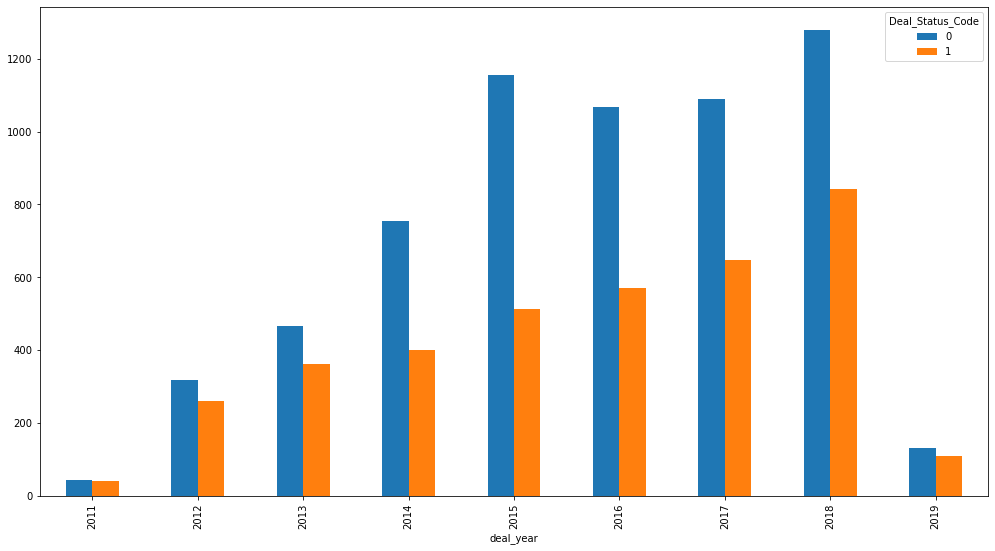

In [58]:
#check relation of year / month on deal_status_code

cs_year = vs_dealstatus(data=df,x='deal_year')

cs_year

In [59]:
# data is less for year 2011 and 2019**
#replace 2011 with 2012 and 2019 with 2018
df['deal_year'] = df['deal_year'].replace(2011,2012)
df['deal_year'] = df['deal_year'].replace(2019,2018)

In [60]:
cs_year['percent'] = cs_year[1]/(cs_year[0]+cs_year[1])

<AxesSubplot:xlabel='deal_year', ylabel='percent'>

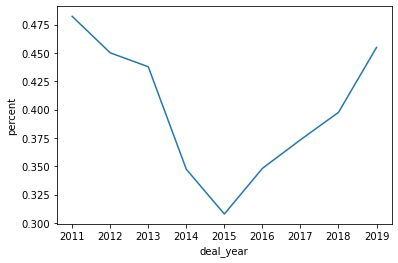

In [61]:
sns.lineplot(y=cs_year['percent'],x=cs_year.index ,ci=None)
#highest win percentage was for year 2011
#lowest was for 2015

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


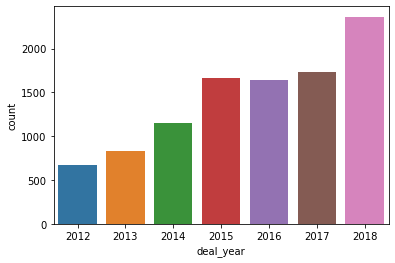

In [62]:
sns.countplot(df.deal_year)
plt.show()

#### Number of deals increase from 2012 to 2015 .   remains stables from 2015 to 2017 .   again increase in 2018

### Month

In [63]:
df['deal_month'] = pd.DatetimeIndex(df['Deal_Date']).month

In [64]:
for i in df['deal_month'].unique():
    if i in range(1,4):
        val = 'Q1'
    elif i in range(4,7):
        val = 'Q2'
    elif i in range(7,10):
        val = 'Q3'
    else:
        val = 'Q4'
    
    df['deal_month'][df['deal_month'] == i] = val

df['deal_month'].unique()

<ipython-input-64-3d3ba823ecdd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deal_month'][df['deal_month'] == i] = val


array(['Q1', 'Q3', 'Q2', 'Q4'], dtype=object)

### group by year and month to get the investment idea in quaters

(28, 2)

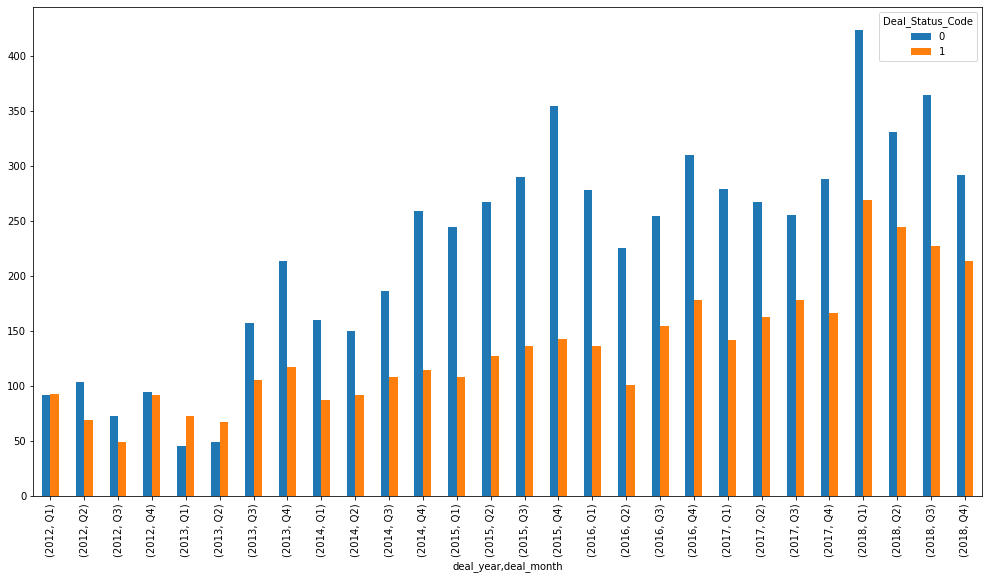

In [66]:
cs_yr_mnth = df.groupby(['deal_year','deal_month']).Deal_Status_Code.value_counts(normalize=False)
cs_yr_mnth = cs_yr_mnth.unstack()
cs_yr_mnth.plot(kind='bar',figsize=(17, 9))
cs_yr_mnth.shape

#### as per the line plot when there is profit investors bid more in next qaurter
#### when there is loss investors bid less in next qaurter
#### more invest more risk
#### droping deal month since it will be of no significance


In [67]:
cs_yr_mnth['percent'] = (cs_yr_mnth[1]/(cs_yr_mnth[1]+cs_yr_mnth[0]))*1000

In [72]:
cs_yr_mnth = cs_yr_mnth.reset_index()

<AxesSubplot:xlabel='deal_year', ylabel='percent'>

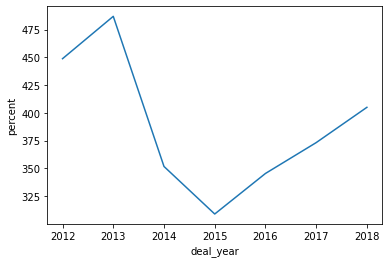

In [74]:
sns.lineplot(y=cs_yr_mnth['percent'],x=cs_yr_mnth.deal_year ,ci=None)

### The above line plot gives the win percent over the years

In [75]:
#droping unwanted columns
df.drop(columns=['Deal_Date','deal_month'],axis=1,inplace=True)

In [76]:
#converting year to age
df.deal_year = 2021 - df.deal_year


In [77]:
df1 = df.copy()
#BACKUP

## Manager Name

In [83]:
len(df.Manager_Name.unique()) #278

278

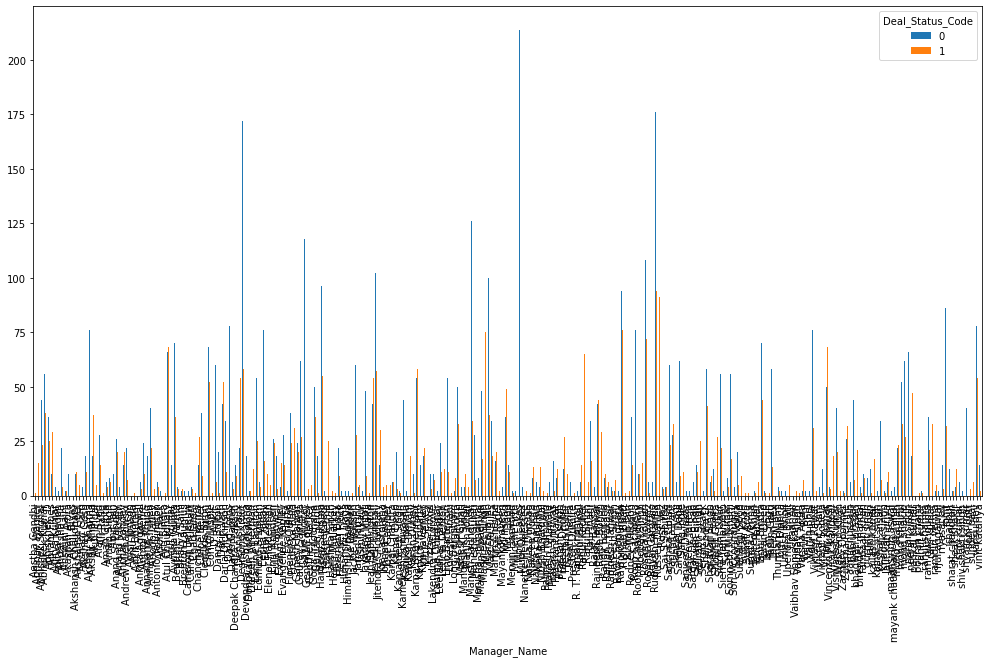

In [90]:
cs_manager = vs_dealstatus(data=df,x='Manager_Name')

In [91]:
cs_manager['win_precnt']= cs_manager[1]/(cs_manager[1] + cs_manager[0])
cs_manager.sort_values('win_precnt',ascending=False)

Deal_Status_Code,0,1,win_precnt
Manager_Name,,,
Long Bergstrom,2.0,8.0,0.800000
Evalyn Rayner,4.0,15.0,0.789474
Rateesh Singh,2.0,7.0,0.777778
Varsha Arora,2.0,7.0,0.777778
Neha Sharma,4.0,13.0,0.764706
...,...,...,...
rijul aggarwal,2.0,NaN,NaN
shafibul,12.0,NaN,NaN
shiv kumar,6.0,NaN,NaN


In [92]:
#best manger : not considering the 0 loss mangers

In [93]:
cs_manager = cs_manager.sort_values(1,ascending=False)

In [94]:
cs_manager

Deal_Status_Code,0,1,win_precnt
Manager_Name,,,
Molly Eakes,214.0,109.0,0.337461
Rudraksh Sharma,176.0,94.0,0.348148
Russell Dahlen,52.0,91.0,0.636364
Rayford Durgan,94.0,76.0,0.447059
Manpreet Singh,106.0,75.0,0.414365
...,...,...,...
pankaj kumar,2.0,NaN,NaN
rijul aggarwal,2.0,NaN,NaN
shafibul,12.0,NaN,NaN


## VP_Name

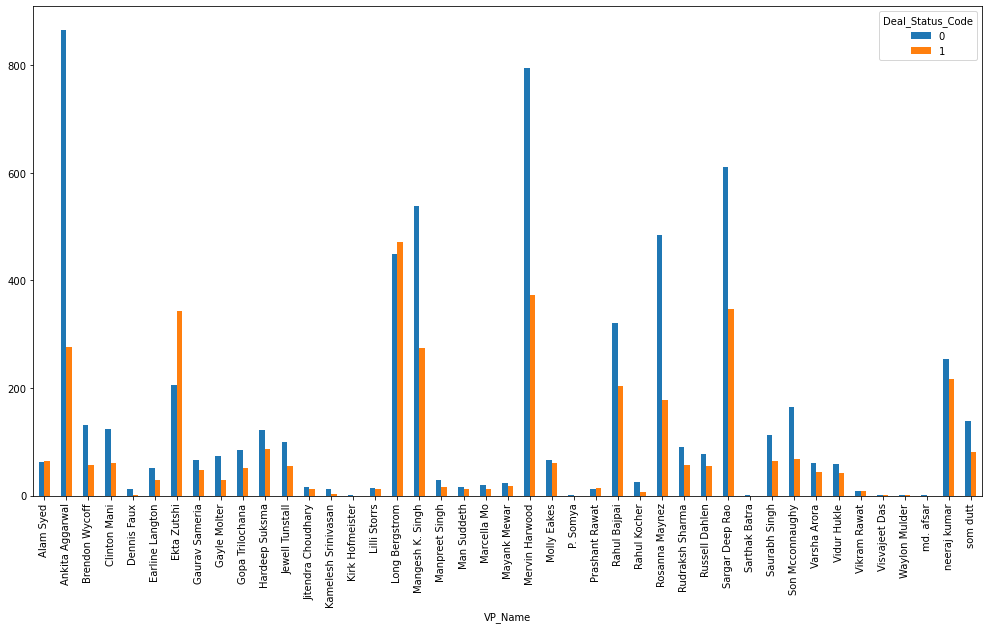

In [95]:

len(df.VP_Name.unique()) #43

cs_vp = vs_dealstatus(data=df,x='VP_Name')

### There are few VP with more win rate Ekta Zutshi , Long Bergstrom

In [96]:
cs_vp = cs_vp.sort_values(1,ascending=False)

win_vp = cs_vp.head(15).index
#will keep top 15 mangers with most win to include only these in dataframe


## Top Manager and VP combination 

In [98]:
won_cs = df.groupby(['VP_Name','Manager_Name']).Deal_Status_Code.value_counts(normalize=False)
won_cs = won_cs.unstack()

In [99]:
#calculate win percentage and store in other column
won_cs['win_percent'] = won_cs[1]/(won_cs[0]+won_cs[1])

won_cs.sort_values('win_percent',ascending=False).head(10)

,Deal_Status_Code,0,1,win_percent
VP_Name,Manager_Name,,,
Ekta Zutshi,Manpreet Singh,2.0,20.0,0.909091
Long Bergstrom,Akshit Khanna,2.0,16.0,0.888889
Rahul Bajpai,Jitendra Choudhary,2.0,15.0,0.882353
Ekta Zutshi,neeraj kumar,6.0,40.0,0.869565
Hardeep Suksma,Atul Chaudhary,2.0,13.0,0.866667
Long Bergstrom,Rayford Durgan,4.0,23.0,0.851852
Earline Langton,Neha Sharma,2.0,9.0,0.818182
Hardeep Suksma,ram kumar,2.0,9.0,0.818182
Ekta Zutshi,Chanchal sharma,4.0,17.0,0.809524


In [100]:
#8)SBU Head-Bid Manager pair which will have the highest winning probability for the bid.
print('Top 10 VP and Manager combination with highest winning probability\n{}'.format(won_cs.sort_values('win_percent',ascending=False).head(10).index))


Top 10 VP and Manager combination with highest winning probability
MultiIndex([(    'Ekta Zutshi',     'Manpreet Singh'),
            ( 'Long Bergstrom',      'Akshit Khanna'),
            (   'Rahul Bajpai', 'Jitendra Choudhary'),
            (    'Ekta Zutshi',       'neeraj kumar'),
            ( 'Hardeep Suksma',     'Atul Chaudhary'),
            ( 'Long Bergstrom',     'Rayford Durgan'),
            ('Earline Langton',        'Neha Sharma'),
            ( 'Hardeep Suksma',          'ram kumar'),
            (    'Ekta Zutshi',    'Chanchal sharma'),
            ( 'Long Bergstrom',       'Naveen Dogra')],
           names=['VP_Name', 'Manager_Name'])


### EDA part done

In [103]:
fc = df.select_dtypes(include='object').columns.values
print(fc)

['Client_Category' 'Solution_Type' 'Sector' 'Location' 'VP_Name'
 'Manager_Name']


## One Hot Encoding 

### Encoding Manager and VP

In [105]:

top_managers = df.Manager_Name.value_counts().head(14).index
for manager in top_managers:
    df[manager] = np.where(df['Manager_Name']==manager,1,0)
    
df.head()
df.drop('Manager_Name',axis=1,inplace=True)


top_vp = df.VP_Name.value_counts().head(14).index
for vp in top_vp:
    df[vp] = np.where(df['VP_Name']==vp,1,0)

df.head()
df.drop('VP_Name',axis=1,inplace=True)


In [106]:
fc = df.select_dtypes(include = 'object').columns.values

In [107]:
for c in fc:
    dummy = pd.get_dummies(df[c],drop_first = True , prefix = c)
    df = df.join(dummy)

df.drop(fc,axis=1,inplace=True)

In [108]:
df.shape

(10061, 83)

## Funtions for model Building

In [109]:
#train test split
def splitdata(data,y,tst_size):
    xtrain,xtest,ytrain,ytest = train_test_split(data.drop(y,axis=1),data[y],test_size=tst_size)
    return (xtrain,xtest,ytrain,ytest)

In [110]:
#Logistic Regression 
def buildmodel(trainx,trainy):
    model = smapi.Logit(trainy,trainx).fit()
    return(model)

In [111]:
#Prediction  cutoff function
def predToClass(preds,cutoff):
    P = preds.copy()
    P[P < cutoff] = 0
    P[P > cutoff] = 1
    return(P.astype(int))

In [112]:

#Confusion matrix crosstab and ROC AUC curve

def cm_auc(actual,predicted):
    # cross tab method
    df1 = pd.DataFrame({'actual':actual,'predicted':predicted})
    print(pd.crosstab(df1.actual,df1.predicted,margins=True))
    
    # classification report
    print(classification_report(actual,predicted))
    
    # ROC and AUC
    fpr,tpr,_ = metrics.roc_curve(actual,predicted)
    # area under the curve measure
    roc_auc = metrics.auc(fpr,tpr)
    
    plt.title('ROC')
    plt.plot(fpr,tpr,'b',label='AUC={}%'.format(round(roc_auc*100,3)))
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('1- False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()


## Model 1 : Logistic Rregression

In [113]:
Xtrain1, Xtest1,ytrain1,ytest1 = splitdata(df,'Deal_Status_Code',0.3)
print(Xtest1.shape,Xtrain1.shape)

(3019, 82) (7042, 82)


In [114]:
lr_m1 = smapi.Logit(ytrain1,Xtrain1).fit()

Optimization terminated successfully.
         Current function value: 0.597555
         Iterations 6


In [115]:
lr_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Deal_Status_Code   No. Observations:                 7042
Model:                          Logit   Df Residuals:                     6960
Method:                           MLE   Df Model:                           81
Date:                Tue, 05 Oct 2021   Pseudo R-squ.:                 0.09618
Time:                        13:26:00   Log-Likelihood:                -4208.0
converged:                       True   LL-Null:                       -4655.8
Covariance Type:            nonrobust   LLR p-value:                1.483e-137
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Deal_Cost                             -4.534e-08   1.83e-08     -2.483      0.013   -8.11e-08   -9.55e-09
deal_year                                -0.0138      0.020     -0.703      0.482      -0.052       0.025
Molly Eakes                              -0.9706      0.172     -5.644      0.000      -1.308      -0.634
Rudraksh Sharma                          -0.0453      0.199     -0.228      0.820      -0.435       0.345
Desmond Krout                            -0.2255      0.220     -1.024      0.306      -0.657       0.206
Gayle Molter                             -0.0602      0.230     -0.262      0.794      -0.512       0.391
Manpreet Singh                            0.5909      0.204      2.899      0.004       0.191       0.990
Rosana Yokum                              0.6814      0.198      3.440      0.001       0.293       1.070
Rayford Durgan                           -0.0354      0.225     -0.157      0.875      -0.477       0.406
Manish Saundriyal                         0.1773      0.253      0.701      0.483      -0.319       0.673
Jewell Tunstall                          -0.1212      0.235     -0.515      0.607      -0.583       0.340
Hardeep Suksma                            0.2199      0.203      1.084      0.278      -0.178       0.618
ram kumar                                -0.4229      0.264     -1.604      0.109      -0.940       0.094
Rahul Kocher                              0.1934      0.228      0.849      0.396      -0.253       0.640
Russell Dahlen                            0.2809      0.225      1.248      0.212      -0.160       0.722
Marcella Mo                              -0.4493      0.266     -1.689      0.091      -0.971       0.072
Mervin Harwood                           -0.0319      0.126     -0.254      0.799      -0.278       0.214
Ankita Aggarwal                          -0.5837      0.134     -4.367      0.000      -0.846      -0.322
Sargar Deep Rao                          -0.1183      0.126     -0.942      0.346      -0.364       0.128
Long Bergstrom                            0.3631      0.127      2.855      0.004       0.114       0.612
Mangesh K. Singh                         -0.3486      0.134     -2.607      0.009      -0.611      -0.087
Rosanna Maynez                           -0.4854      0.143     -3.405      0.001      -0.765      -0.206
Ekta Zutshi                               0.6297      0.152      4.142      0.000       0.332       0.928
Rahul Bajpai                             -0.1886      0.156     -1.211      0.226      -0.494       0.117
neeraj kumar                             -0.0066      0.155     -0.043      0.966      -0.310       0.297
Son Mcconnaughy                          -0.2165      0.201     -1.077      0.282      -0.611       0.178
som dutt                                 -0.0762      0.196     -0.388      0.698      -0.461       0.309
Brendon Wycoff                           -0.7065      0.221  

### Deal Year has p value > 0.05 removing it from next model

predicted     0     1   All
actual                     
0          1228   671  1899
1           429   691  1120
All        1657  1362  3019
              precision    recall  f1-score   support

           0       0.74      0.65      0.69      1899
           1       0.51      0.62      0.56      1120

    accuracy                           0.64      3019
   macro avg       0.62      0.63      0.62      3019
weighted avg       0.65      0.64      0.64      3019



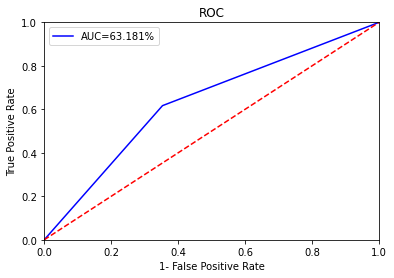

In [116]:
p1 = lr_m1.predict(Xtest1)
p1 = predToClass(p1, 0.37)    
cm_auc(ytest1,p1)

### Model Summary

In [117]:
#model Summary
model_summary = pd.DataFrame([('Log Reg 1','lr_m1',65,62,64,63.18)],
                             columns=('Algorithm','ModelName','0%','1%','acc %','AUC'))

In [118]:
model_summary

,Algorithm,ModelName,0%,1%,acc %,AUC
0,Log Reg 1,lr_m1,65,62,64,63.18


In [119]:
"""### as per the summary deal year can be removed"""

'### as per the summary deal year can be removed'

In [126]:
Xtrain2,Xtest2,ytrain2,ytes2 = splitdata(df.drop(['deal_year','Deal_Cost'],axis=1),'Deal_Status_Code',0.3)

Xtrain2.shape
Xtest2.shape

(3019, 80)

In [127]:
lr_m2 = buildmodel(Xtrain2, ytrain2)
lr_m2.summary()

Optimization terminated successfully.
         Current function value: 0.595774
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Deal_Status_Code   No. Observations:                 7042
Model:                          Logit   Df Residuals:                     6962
Method:                           MLE   Df Model:                           79
Date:                Tue, 05 Oct 2021   Pseudo R-squ.:                 0.09767
Time:                        15:31:29   Log-Likelihood:                -4195.4
converged:                       True   LL-Null:                       -4649.6
Covariance Type:            nonrobust   LLR p-value:                4.019e-141
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Molly Eakes                              -1.0849      0.174     -6.232      0.000      -1.426      -0.744
Rudraksh Sharma                          -0.1255      0.193     -0.651      0.515      -0.503       0.252
Desmond Krout                            -0.3781      0.229     -1.652      0.098      -0.827       0.070
Gayle Molter                             -0.4282      0.227     -1.889      0.059      -0.873       0.016
Manpreet Singh                            0.5800      0.212      2.740      0.006       0.165       0.995
Rosana Yokum                              0.6086      0.200      3.050      0.002       0.217       1.000
Rayford Durgan                           -0.0690      0.229     -0.301      0.763      -0.518       0.380
Manish Saundriyal                         0.0965      0.259      0.372      0.710      -0.412       0.605
Jewell Tunstall                          -0.1067      0.238     -0.449      0.653      -0.573       0.359
Hardeep Suksma                            0.1941      0.197      0.987      0.324      -0.191       0.580
ram kumar                                -0.4981      0.256     -1.945      0.052      -1.000       0.004
Rahul Kocher                              0.0858      0.218      0.394      0.694      -0.342       0.513
Russell Dahlen                            0.5929      0.240      2.473      0.013       0.123       1.063
Marcella Mo                              -0.5501      0.257     -2.143      0.032      -1.053      -0.047
Mervin Harwood                            0.0565      0.119      0.474      0.635      -0.177       0.290
Ankita Aggarwal                          -0.7711      0.136     -5.665      0.000      -1.038      -0.504
Sargar Deep Rao                          -0.0154      0.116     -0.133      0.894      -0.243       0.212
Long Bergstrom                            0.4130      0.121      3.400      0.001       0.175       0.651
Mangesh K. Singh                         -0.3042      0.123     -2.470      0.013      -0.546      -0.063
Rosanna Maynez                           -0.5780      0.136     -4.241      0.000      -0.845      -0.311
Ekta Zutshi                               0.8630      0.142      6.057      0.000       0.584       1.142
Rahul Bajpai                              0.0553      0.152      0.364      0.716      -0.243       0.353
neeraj kumar                             -0.0367      0.153     -0.239      0.811      -0.337       0.264
Son Mcconnaughy                          -0.0034      0.200     -0.017      0.987      -0.396       0.389
som dutt                                 -0.1596      0.191     -0.834      0.404      -0.535       0.216
Brendon Wycoff                           -0.5458      0.214     -2.554      0.011      -0.965      -0.127
Clinton Mani                              0.1051      0.209      0.502      0.616      -0.305       0.515
Client_Category_Consulting               -0.3151      0.198  

predicted     0     1   All
actual                     
0          1179   708  1887
1           432   700  1132
All        1611  1408  3019
              precision    recall  f1-score   support

           0       0.73      0.62      0.67      1887
           1       0.50      0.62      0.55      1132

    accuracy                           0.62      3019
   macro avg       0.61      0.62      0.61      3019
weighted avg       0.64      0.62      0.63      3019



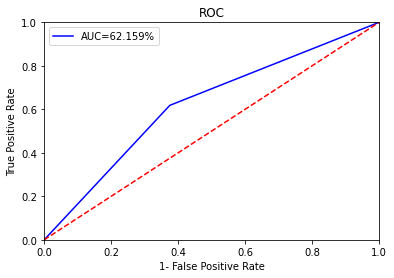

In [129]:
p2 = lr_m2.predict(Xtest2)
p2= predToClass(p2, 0.37)
cm_auc(ytes2,p2)

In [130]:
#model summary
Model_dict = {'Algorithm':'Linear Reg 2','ModelName':'lr_m2','0%':62,'1%':62,'acc %':62,'AUC':62.1}
model_summary= model_summary.append(Model_dict,ignore_index=True)
print(model_summary)


      Algorithm ModelName  0%  1%  acc %    AUC
0     Log Reg 1     lr_m1  65  62     64  63.18
1  Linear Reg 2     lr_m2  62  62     62  62.10


## Oversample : Model 3

In [131]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
chx,chy = sm.fit_resample(df.drop('Deal_Status_Code',1),df.Deal_Status_Code)


In [132]:
df_ovr = chx.join(chy)
df_ovr.shape
df_ovr.Deal_Status_Code.value_counts()


0    6306
1    6306
Name: Deal_Status_Code, dtype: int64

In [133]:
#model3 
Xtrain3,Xtest3,ytrain3,ytest3 = splitdata(df_ovr.drop('Deal_Cost',1),'Deal_Status_Code',0.3)

Xtrain3.shape
Xtest3.shape

(3784, 81)

In [134]:
ovr_lr1 = buildmodel(Xtrain3, ytrain3)
ovr_lr1.summary()

Optimization terminated successfully.
         Current function value: 0.560980
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Deal_Status_Code   No. Observations:                 8828
Model:                          Logit   Df Residuals:                     8747
Method:                           MLE   Df Model:                           80
Date:                Tue, 05 Oct 2021   Pseudo R-squ.:                  0.1906
Time:                        15:34:13   Log-Likelihood:                -4952.3
converged:                       True   LL-Null:                       -6118.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
deal_year                                 0.3784      0.013     28.665      0.000       0.353       0.404
Molly Eakes                              -1.5017      0.174     -8.636      0.000      -1.843      -1.161
Rudraksh Sharma                          -0.3713      0.196     -1.898      0.058      -0.755       0.012
Desmond Krout                            -0.9703      0.226     -4.293      0.000      -1.413      -0.527
Gayle Molter                             -0.3983      0.231     -1.722      0.085      -0.852       0.055
Manpreet Singh                            0.3155      0.214      1.473      0.141      -0.104       0.736
Rosana Yokum                              0.7907      0.208      3.793      0.000       0.382       1.199
Rayford Durgan                            0.0005      0.220      0.002      0.998      -0.431       0.432
Manish Saundriyal                        -0.3851      0.262     -1.471      0.141      -0.898       0.128
Jewell Tunstall                          -0.3759      0.261     -1.442      0.149      -0.887       0.135
Hardeep Suksma                            0.2227      0.198      1.125      0.261      -0.165       0.611
ram kumar                                -0.8159      0.275     -2.965      0.003      -1.355      -0.277
Rahul Kocher                              0.1093      0.223      0.490      0.624      -0.328       0.547
Russell Dahlen                            0.2899      0.244      1.190      0.234      -0.187       0.767
Marcella Mo                              -0.8238      0.258     -3.188      0.001      -1.330      -0.317
Mervin Harwood                           -0.8371      0.115     -7.300      0.000      -1.062      -0.612
Ankita Aggarwal                          -0.9951      0.124     -8.028      0.000      -1.238      -0.752
Sargar Deep Rao                          -1.1097      0.117     -9.492      0.000      -1.339      -0.881
Long Bergstrom                           -0.6044      0.117     -5.152      0.000      -0.834      -0.374
Mangesh K. Singh                         -1.3459      0.125    -10.801      0.000      -1.590      -1.102
Rosanna Maynez                           -1.5758      0.137    -11.532      0.000      -1.844      -1.308
Ekta Zutshi                              -0.6218      0.142     -4.375      0.000      -0.900      -0.343
Rahul Bajpai                             -0.6219      0.155     -4.018      0.000      -0.925      -0.319
neeraj kumar                             -0.5944      0.149     -3.992      0.000      -0.886      -0.303
Son Mcconnaughy                          -0.5188      0.209     -2.478      0.013      -0.929      -0.108
som dutt                                 -1.1021      0.194     -5.671      0.000      -1.483      -0.721
Brendon Wycoff                           -1.1682      0.221     -5.281      0.000      -1.602      -0.735
Clinton Mani                             -0.3550      0.219  

predicted     0     1   All
actual                     
0          1210   731  1941
1           471  1372  1843
All        1681  2103  3784
              precision    recall  f1-score   support

           0       0.72      0.62      0.67      1941
           1       0.65      0.74      0.70      1843

    accuracy                           0.68      3784
   macro avg       0.69      0.68      0.68      3784
weighted avg       0.69      0.68      0.68      3784



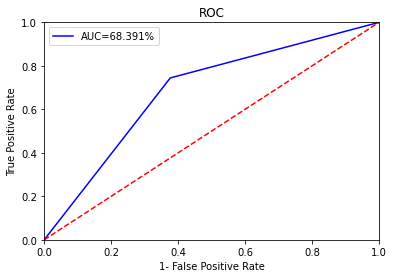

In [135]:
p3 = ovr_lr1.predict(Xtest3)
p3= predToClass(p3, 0.4)
cm_auc(ytest3,p3)


In [136]:
#model summary
Model_dict = {'Algorithm':'LR_ovrSample','ModelName':'ovr_lr1','0%':62,'1%':74,'acc %':69,'AUC':68.39}
model_summary= model_summary.append(Model_dict,ignore_index=True)
print(model_summary)

      Algorithm ModelName  0%  1%  acc %    AUC
0     Log Reg 1     lr_m1  65  62     64  63.18
1  Linear Reg 2     lr_m2  62  62     62  62.10
2  LR_ovrSample   ovr_lr1  62  74     69  68.39


## Decision Tree

### keeping only top managers and VP based on the count and converting rest value to Others: required  for label encoding

In [137]:
bottom_man = [x for x in df1['Manager_Name'].value_counts().sort_values(ascending=False).tail(278-15).index]

len(bottom_man)

for label in bottom_man:
    df1['Manager_Name'] = df1['Manager_Name'].replace(label,'Others')
   

In [138]:
bottom_vp = [x for x in df1['VP_Name'].value_counts().sort_values(ascending=False).tail(43-15).index ]
 
for vp in bottom_vp:
    df1['VP_Name'] = df1['VP_Name'].replace(vp,'Others')


In [141]:
df1['Manager_Name'].value_counts()

Others               7757
Molly Eakes           323
Rudraksh Sharma       270
Desmond Krout         230
Gayle Molter          186
Manpreet Singh        181
Rosana Yokum          180
Rayford Durgan        170
Manish Saundriyal     160
Jewell Tunstall       159
Hardeep Suksma        151
ram kumar             149
Rahul Kocher          145
Name: Manager_Name, dtype: int64

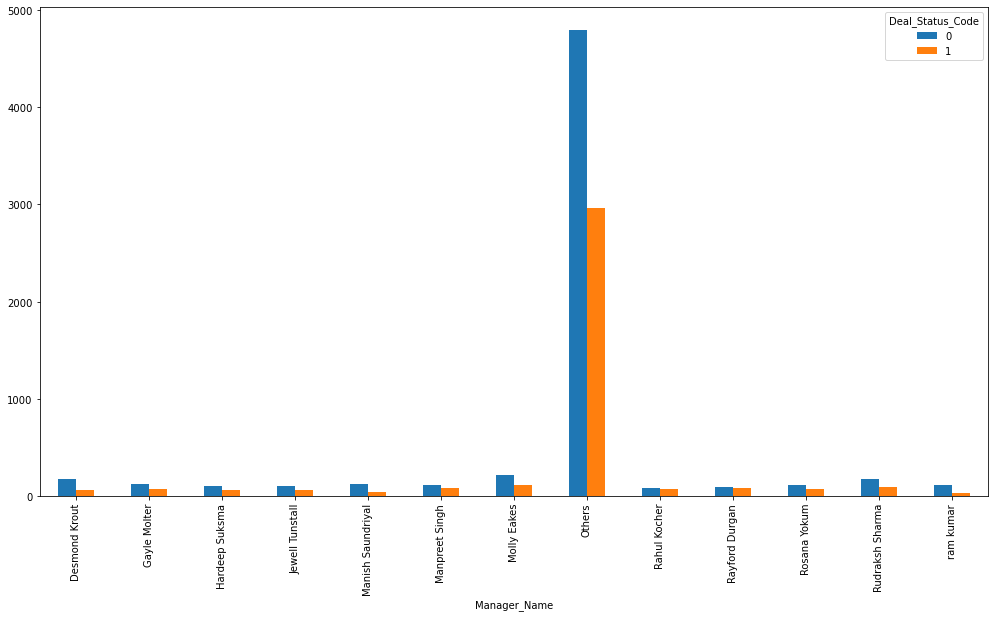

In [145]:
cs_manager1 = vs_dealstatus(data=df1,x='Manager_Name')

In [142]:
df1['VP_Name'].value_counts()

Others              2197
Mervin Harwood      1166
Ankita Aggarwal     1143
Sargar Deep Rao      956
Long Bergstrom       921
Mangesh K. Singh     812
Rosanna Maynez       662
Ekta Zutshi          550
Rahul Bajpai         523
neeraj kumar         471
Son Mcconnaughy      232
som dutt             220
Hardeep Suksma       208
Name: VP_Name, dtype: int64

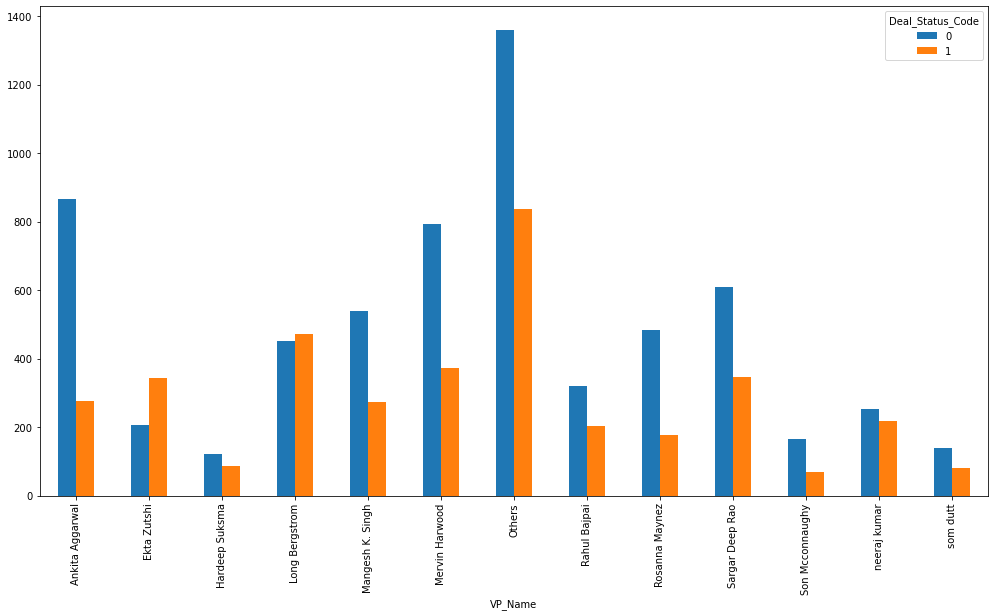

In [146]:
cs_vp1 = vs_dealstatus(data=df1,x='VP_Name')

In [147]:
fc = df1.select_dtypes(include= 'object').columns.values

#### Label encoding

In [148]:
for feature in fc:
    df1[feature] =  label_ecoder.fit_transform(df1[feature])


## Model 4

In [149]:
Xtrain5,Xtest5,ytrain5,ytest5 = splitdata(df1,'Deal_Status_Code',tst_size=0.2)

predicted     0    1   All
actual                    
0          1157   95  1252
1           306  455   761
All        1463  550  2013
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1252
           1       0.83      0.60      0.69       761

    accuracy                           0.80      2013
   macro avg       0.81      0.76      0.77      2013
weighted avg       0.80      0.80      0.79      2013



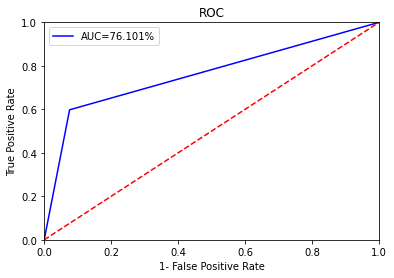

In [150]:
dt_m1 = DecisionTreeClassifier(criterion ='gini').fit(Xtrain5,ytrain5)
p5 = dt_m1.predict(Xtest5)
cm_auc(ytest5,p5)

In [151]:
#model summary
Model_dict = {'Algorithm':'DT gini','ModelName':'dt_m1','0%':92,'1%':60,
              'acc %':80,'AUC':76.10}
model_summary= model_summary.append(Model_dict,ignore_index=True)
print(model_summary)

      Algorithm ModelName  0%  1%  acc %    AUC
0     Log Reg 1     lr_m1  65  62     64  63.18
1  Linear Reg 2     lr_m2  62  62     62  62.10
2  LR_ovrSample   ovr_lr1  62  74     69  68.39
3       DT gini     dt_m1  92  60     80  76.10


### Tree prune

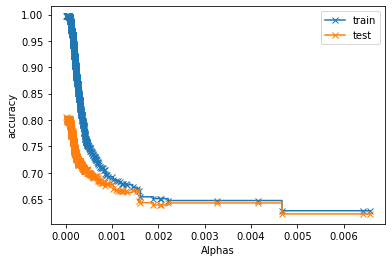

In [155]:

#Tree prune
path = dt_m1.cost_complexity_pruning_path(Xtrain5, ytrain5)
alphas , impurity = path.ccp_alphas,path.impurities

clfs=[]

alphas
for a in alphas:
    model = DecisionTreeClassifier(ccp_alpha=a).fit(Xtrain5, ytrain5)
    clfs.append(model)

trainscore = [clf.score(Xtrain5,ytrain5)for clf in clfs]
testscore = [clf.score(Xtest5,ytest5)for clf in clfs]  


fig,ax=plt.subplots()
ax.plot(alphas,trainscore,marker='x',label='train',drawstyle="steps-post")
ax.plot(alphas,testscore,marker='x',label='test',drawstyle="steps-post")
ax.set_xlabel("Alphas")
ax.set_ylabel("accuracy")
ax.legend()


#### selecting a range 0.0001 to 0.004 for ccp_alpa

### Hyper parameter

In [153]:
params = {'criterion':['gini','entropy'],
          'max_depth':np.arange(17,50),
          'min_samples_leaf':np.arange(1,10),
          'max_features':np.arange(1,9),
          'ccp_alpha':np.arange(0.0001,0.004)}

#create a decision tree
dtclf = DecisionTreeClassifier()

In [154]:
grid = GridSearchCV(dtclf,param_grid=params,
                    scoring='accuracy',cv=10,n_jobs=-1).fit(Xtrain5,ytrain5)


In [156]:
bp = grid.best_params_
grid.best_score_

0.791255214610179

In [157]:
dt_m2 = DecisionTreeClassifier(criterion = bp['criterion'],max_depth=bp['max_depth'],
                               min_samples_leaf=bp['min_samples_leaf'],
                               max_features=bp['max_features'],ccp_alpha=bp['ccp_alpha']).fit(Xtrain5,ytrain5)


predicted     0    1   All
actual                    
0          1126  126  1252
1           288  473   761
All        1414  599  2013
              precision    recall  f1-score   support

           0       0.80      0.90      0.84      1252
           1       0.79      0.62      0.70       761

    accuracy                           0.79      2013
   macro avg       0.79      0.76      0.77      2013
weighted avg       0.79      0.79      0.79      2013



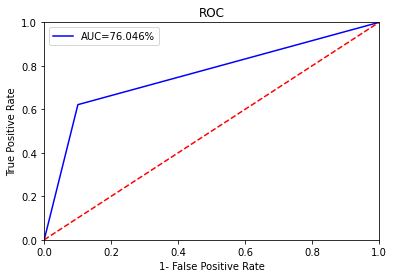

In [158]:
p6 = dt_m2.predict(Xtest5)
cm_auc(ytest5,p6)

In [159]:
#model summary
Model_dict = {'Algorithm':'DT_hyp','ModelName':'dt_m2','0%':90,'1%':62,
              'acc %':79,'AUC':76.04}
model_summary= model_summary.append(Model_dict,ignore_index=True)
print(model_summary)

      Algorithm ModelName  0%  1%  acc %    AUC
0     Log Reg 1     lr_m1  65  62     64  63.18
1  Linear Reg 2     lr_m2  62  62     62  62.10
2  LR_ovrSample   ovr_lr1  62  74     69  68.39
3       DT gini     dt_m1  92  60     80  76.10
4        DT_hyp     dt_m2  90  62     79  76.04


## Random Forest

predicted     0    1   All
actual                    
0          1190   62  1252
1           328  433   761
All        1518  495  2013
              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1252
           1       0.87      0.57      0.69       761

    accuracy                           0.81      2013
   macro avg       0.83      0.76      0.77      2013
weighted avg       0.82      0.81      0.80      2013



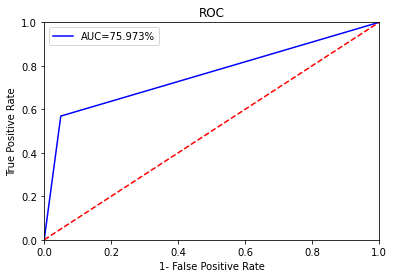

In [163]:
rf_m1 = RandomForestClassifier().fit(Xtrain5,ytrain5)
p7 = rf_m1.predict(Xtest5)
cm_auc(ytest5,p7)

In [164]:
Model_dict = {'Algorithm':'RandomForest','ModelName':'rf_m1','0%':95,'1%':57,
              'acc %':81,'AUC':75.97}
model_summary= model_summary.append(Model_dict,ignore_index=True)
print(model_summary)

      Algorithm ModelName  0%  1%  acc %    AUC
0     Log Reg 1     lr_m1  65  62     64  63.18
1  Linear Reg 2     lr_m2  62  62     62  62.10
2  LR_ovrSample   ovr_lr1  62  74     69  68.39
3       DT gini     dt_m1  92  60     80  76.10
4        DT_hyp     dt_m2  90  62     79  76.04
5  RandomForest     rf_m1  95  57     81  75.97


## Random forests hyper paramter

In [176]:
params_rf= {'criterion':['gini','entropy'],
          'n_estimators':np.arange(98,120)}

rfclf = RandomForestClassifier()

#import sklearn
#sorted(sklearn.metrics.SCORERS.keys())

grid = GridSearchCV(rfclf,param_grid=params_rf,scoring='balanced_accuracy',cv=10,n_jobs=-1).fit(Xtrain5,ytrain5)

In [177]:
bp = grid.best_params_
grid.best_score_

0.7542770415837571

predicted     0    1   All
actual                    
0          1183   69  1252
1           323  438   761
All        1506  507  2013
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1252
           1       0.86      0.58      0.69       761

    accuracy                           0.81      2013
   macro avg       0.82      0.76      0.77      2013
weighted avg       0.82      0.81      0.79      2013



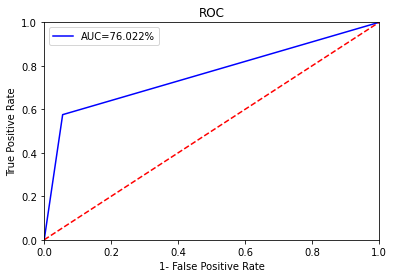

In [178]:
rf_m2 = RandomForestClassifier(criterion=bp['criterion'],n_estimators=bp['n_estimators']).fit(Xtrain5,ytrain5)
p_rf = rf_m2.predict(Xtest5)
cm_auc(ytest5,p_rf)


In [179]:
Model_dict = {'Algorithm':'RF_hyp','ModelName':'rf_m2','0%':94,'1%':58,
              'acc %':81,'AUC':76.02}
model_summary= model_summary.append(Model_dict,ignore_index=True)
print(model_summary)

      Algorithm ModelName  0%  1%  acc %    AUC
0     Log Reg 1     lr_m1  65  62     64  63.18
1  Linear Reg 2     lr_m2  62  62     62  62.10
2  LR_ovrSample   ovr_lr1  62  74     69  68.39
3       DT gini     dt_m1  92  60     80  76.10
4        DT_hyp     dt_m2  90  62     79  76.04
5  RandomForest     rf_m1  95  57     81  75.97
6        RF_hyp     rf_m2  94  58     81  76.02


In [180]:
df2= df1.copy()

### Perform oversampling and check balanced accuracy

In [181]:
from imblearn.over_sampling import SMOTE
sm1 = SMOTE()

In [182]:
chx1,chy1 = sm1.fit_resample(df1.drop('Deal_Status_Code',1),df1.Deal_Status_Code)

# dataset for model 2
df_ovr1 = chx1.join(chy1)
df_ovr1.shape

(12612, 9)

In [183]:
#split data
Xtrain6,Xtest6,ytrain6,ytest6 = splitdata(df_ovr1,'Deal_Status_Code',0.2)

Xtrain6.shape,Xtest6.shape

params_rf= {'criterion':['gini','entropy'],
          'n_estimators':np.arange(98,120)}

rfclf = RandomForestClassifier()

In [184]:
grid = GridSearchCV(rfclf,param_grid=params_rf,scoring='balanced_accuracy',cv=10,n_jobs=-1).fit(Xtrain6,ytrain6)

grid.best_score_
grid.best_params_

{'criterion': 'entropy', 'n_estimators': 111}

predicted     0     1   All
actual                     
0          1180   106  1286
1           229  1008  1237
All        1409  1114  2523
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1286
           1       0.90      0.81      0.86      1237

    accuracy                           0.87      2523
   macro avg       0.87      0.87      0.87      2523
weighted avg       0.87      0.87      0.87      2523



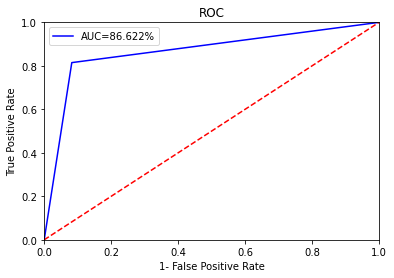

In [185]:
rm_ovr = rf_m2 = RandomForestClassifier(criterion='entropy',n_estimators=99).fit(Xtrain6,ytrain6)
p8 = rm_ovr.predict(Xtest6)
cm_auc(ytest6,p8)

In [186]:
Model_dict = {'Algorithm':'RF_ovr sample','ModelName':'rf_ovr','0%':92,'1%':81,
              'acc %':87,'AUC':86.622}
model_summary= model_summary.append(Model_dict,ignore_index=True)
print(model_summary)

       Algorithm ModelName  0%  1%  acc %     AUC
0      Log Reg 1     lr_m1  65  62     64  63.180
1   Linear Reg 2     lr_m2  62  62     62  62.100
2   LR_ovrSample   ovr_lr1  62  74     69  68.390
3        DT gini     dt_m1  92  60     80  76.100
4         DT_hyp     dt_m2  90  62     79  76.040
5   RandomForest     rf_m1  95  57     81  75.970
6         RF_hyp     rf_m2  94  58     81  76.020
7  RF_ovr sample    rf_ovr  92  81     87  86.622


## Decision Tree oversample

predicted     0     1   All
actual                     
0          1136   150  1286
1           276   961  1237
All        1412  1111  2523
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1286
           1       0.86      0.78      0.82      1237

    accuracy                           0.83      2523
   macro avg       0.83      0.83      0.83      2523
weighted avg       0.83      0.83      0.83      2523



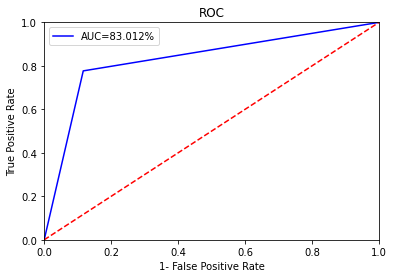

In [187]:
dt_ovr = dt_m2 = DecisionTreeClassifier().fit(Xtrain6,ytrain6)
p9 = dt_ovr.predict(Xtest6)
cm_auc(ytest6,p9)

In [188]:
Model_dict = {'Algorithm':'DT_ovr sample','ModelName':'dt_ovr','0%':88,'1%':78,
              'acc %':83,'AUC':83.012}
model_summary= model_summary.append(Model_dict,ignore_index=True)
print(model_summary)

       Algorithm ModelName  0%  1%  acc %     AUC
0      Log Reg 1     lr_m1  65  62     64  63.180
1   Linear Reg 2     lr_m2  62  62     62  62.100
2   LR_ovrSample   ovr_lr1  62  74     69  68.390
3        DT gini     dt_m1  92  60     80  76.100
4         DT_hyp     dt_m2  90  62     79  76.040
5   RandomForest     rf_m1  95  57     81  75.970
6         RF_hyp     rf_m2  94  58     81  76.020
7  RF_ovr sample    rf_ovr  92  81     87  86.622
8  DT_ovr sample    dt_ovr  88  78     83  83.012


       Algorithm ModelName  0%  1%  acc %     AUC
0      Log Reg 1     lr_m1  65  62     64  63.180
1   Linear Reg 2     lr_m2  62  62     62  62.100
2   LR_ovrSample   ovr_lr1  62  74     69  68.390
3        DT gini     dt_m1  92  60     80  76.100
4         DT_hyp     dt_m2  90  62     79  76.040
5   RandomForest     rf_m1  95  57     81  75.970
6         RF_hyp     rf_m2  94  58     81  76.020
7  RF_ovr sample    rf_ovr  92  81     87  86.622
8  DT_ovr sample    dt_ovr  88  78     83  83.012